# **Project Name**    -  Netflix Movies and TV Shows Clustering



#####**Project Type**- Unsupervised Machine Learning
#####**Contribution** - Individual
#####**Submitted by** - Meenakshi Gurjar


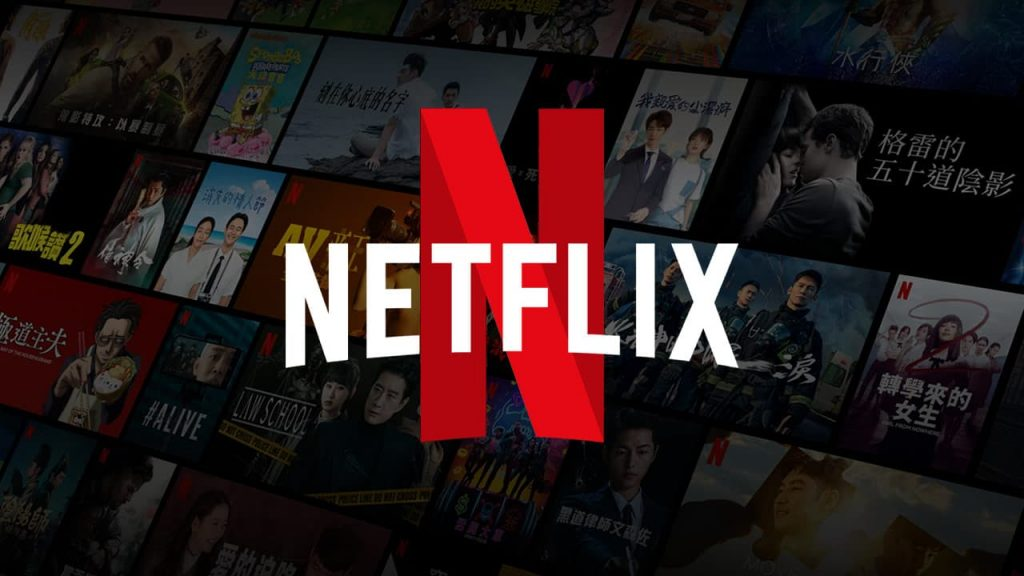

# **Project Summary -**
Netflix is the world's largest online streaming service provider with over 220 million subscribers as of 2022-Q2.

Effective clustering of shows on the Netflix platform is crucial for enhancing the user experience and preventing subscriber churn.

The goal of the project is to classify/group Netflix shows into clusters based on similarity, allowing for personalized show suggestions to users.

The dataset used for this project consists of TV shows and movies available on Netflix as of 2019, collected from Flixable, a third-party Netflix search engine.

A report from 2018 revealed that the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by over 2,000 titles.

Exploring the dataset can uncover further insights, such as understanding the types of content available in different countries and whether Netflix has shifted its focus more towards TV shows in recent years.

Integrating external datasets like IMDB ratings and Rotten Tomatoes can provide additional interesting findings.

Exploratory data analysis can help in understanding the distribution of content types, analyzing trends over time, and identifying patterns or relationships in the data.

Text-based features can be utilized to cluster similar content, allowing for a better understanding of the relationships between different shows and movies on Netflix.

Clustering shows on Netflix based on similarity can enable the platform to offer personalized recommendations to users, improving user engagement and satisfaction.

The dataset from Flixable provides an opportunity to explore the growth and evolution of Netflix's content library, particularly the shift towards producing and acquiring more TV shows.

Analyzing the distribution of content types in different countries can reveal regional preferences and help Netflix tailor its offerings to specific markets.

By integrating external datasets such as IMDB ratings and Rotten Tomatoes, Netflix can gain insights into the quality and popularity of its content, which can inform decision-making processes related to acquisitions and content production.

Clustering shows based on text-based features, such as genre, description, or cast information, can uncover hidden patterns and similarities among different titles, allowing for more targeted content recommendations and a better understanding of user preferences.

These points provide an overview of the objectives, dataset, insights, and methods involved in the project.

# **GitHub Link -**

Repository link-

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

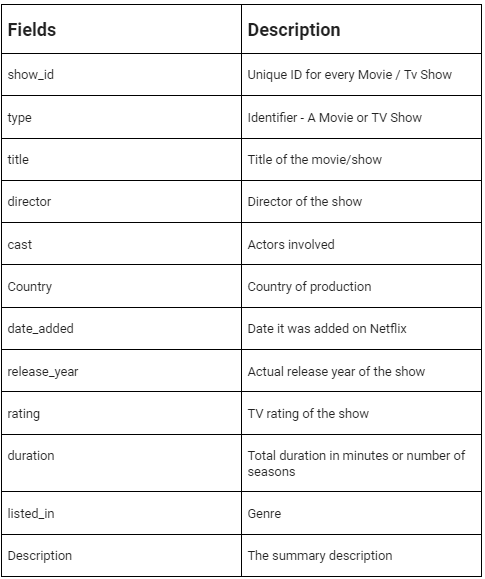

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df= pd.read_csv("/content/drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
#last 5 rows
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

In [ ]:
# Columns name
df.columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

**It's good to see that we do not have any duplicated observation in our dataset.**

#### Missing Values/Null Values

In [ ]:
#Checking Null Values
df.isnull().sum()

In [ ]:
#total null values
df.isnull().sum().sum()


The dataset contains a total of 3,631 null values, with 2,389 of them found in the director column, 718 in the cast column, 507 in the country column, 10 in the date_added column, and 7 in the rating column. It is necessary to address these null values and handle them appropriately.

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
#again checking for the presence of null values
df.isnull().sum()

### What did you know about your dataset?


The dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type. It does not contain any duplicate values, but it does have null values in five columns: **director, cast, country, date_added, and rating.**

This dataset provides a valuable resource for exploring trends in the range of movies and TV shows available on Netflix. Additionally, it can be utilized for developing clustering models to categorize similar titles together based on shared attributes such as **genre, country of origin, and rating.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

In [ ]:
# Dataset Describe
df.describe(include='all').T

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

### Exploratory Data Analysis

####1. Count of Movies and TV Shows

In [ ]:
df['type'].value_counts()

In [ ]:
#Countplot to visualize the number of movies and tv_shows in type column
# Check the data type of the 'type' column
print(df['type'].dtype)

# Check the unique values and their counts in the 'type' column
print(df['type'].value_counts())

# Visualize the number of movies and TV shows using countplot
sns.countplot(data=df, x='type')

# If the data type is not object or string, convert it
df['type'] = df['type'].astype(str)

# Handle missing values if any
df['type'].fillna('Unknown', inplace=True)

# Map incorrect values to the correct ones if needed
df['type'].replace({'TV Show ': 'TV Show'}, inplace=True)

# Visualize the updated countplot
sns.countplot(data=df, x='type')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Check the data type of the 'type' column
print(df['type'].dtype)

# Check the unique values and their counts in the 'type' column
print(df['type'].value_counts())

# Convert the plot to a pie chart
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Movies and TV Shows")
plt.axis('equal')
plt.show()

On Netflix, there are 5,372 movies and 2,398 TV shows available.

TV shows account for 30.9% and movies account for 69.1% of the dataset

This indicates that the number of movies on Netflix is higher than the number of TV shows, highlighting a greater quantity of movies compared to TV show content on the platform.

##2. Which category has highest ratings.

In [ ]:
df['rating']

In [ ]:
df['rating'].value_counts()

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)



In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

In [ ]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])


In [ ]:
df

In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

For TV shows on Netflix, the TV-MA rating category has the highest number of ratings. TV-MA stands for "TV Mature Audience," indicating that the content is intended for adult audiences due to its mature themes, language, or content. This suggests that Netflix offers a significant amount of content targeted at adult viewers.

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)


In both cases, TV-MA has the highest number of ratings for TV shows, indicating that it is the rating category with the most content targeted at adult audiences. TV-MA is associated with mature themes, strong language, and explicit content, making it suitable for viewers who are 17 years or older. This observation suggests that Netflix offers a considerable amount of content catering to adult viewers.

##3. In which year maximum no. of Movies released.

In [ ]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
movies_year


In [ ]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth based on years", y=1.02, fontsize=22);

In [ ]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

The highest number of movies was released in the years 2017 and 2018. These two years saw a significant influx of movies being added to the Netflix platform, indicating a robust release of new content during that period. The specific number of movies released in each year can be obtained from the dataset or further analysis.

In [ ]:
tvshows_year

In [ ]:
#Analysing how many tvshows are released every year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

The years 2017 and 2018 witnessed a substantial release of movies, indicating a peak in new movie additions on the Netflix platform.

The year 2020 saw the highest number of tvshows releases on Netflix, indicating a significant surge in new tv shows content during that year.

The number of movies available on Netflix is growing at a much faster pace than the number of TV shows, suggesting a stronger emphasis on expanding the movie library.

There has been a remarkable increase in the number of movies and television episodes on Netflix since 2015, showcasing a substantial growth in content offerings during that time.

However, there has been a noticeable decline in the production of movies and television episodes after 2020, suggesting a decrease in the rate of new content being added to the platform.

It appears that Netflix has placed a greater focus on increasing its movie content compared to TV shows, as the growth in the number of movies has outpaced that of TV shows in a more pronounced manner.

In [ ]:
df

In [ ]:
#adding columns of month and year of addition
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [ ]:
df.head()

##4.In which month Maximum no. of movies released.

In [ ]:
# Plotting the Countplot

# Check the 'month' column in your DataFrame
print(df['month'].value_counts())
print(df['month'].dtype)

# If the 'month' column contains unexpected values or missing values, handle them
# For example:
# df['month'].fillna('Unknown', inplace=True)
# df['month'].replace({'incorrect_value': 'correct_value'}, inplace=True)

# Plotting the Countplot
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='month', data=df)
plt.show()

The period from October to January experienced the highest influx of new movies and TV shows being added to the Netflix platform. During these months, there was a notable increase in the number of content additions, indicating a peak in new releases and updates to the streaming service's library. This timeframe is likely associated with the holiday season and colder months when people tend to spend more time indoors and engage in streaming entertainment.

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)

Based on the provided graph, it is evident that the highest amount of content is added to Netflix between the months of October and January. During this period, there is a significant spike in the number of additions, indicating a concentrated period of content updates and releases on the platform. This trend suggests that Netflix strategically focuses on introducing new movies and TV shows during the end-of-year holiday season and the beginning of the new year, potentially to cater to increased viewer demand during these months.

##5. Which genre is more popular.

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

According to the data, documentaries are the most prominent genre on Netflix, followed by stand-up comedy, dramas, and international movies. Documentaries likely hold a significant position due to their educational and informative nature, appealing to a wide range of viewers. Stand-up comedy, known for its entertaining and comedic performances, is also highly popular. Dramas, with their compelling narratives and emotional depth, attract a substantial audience. Additionally, the inclusion of international movies highlights the global appeal and diverse content available on Netflix, catering to viewers' preferences from various regions and cultures.

In [ ]:
#Analysing top10 genres of TV Shows
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

According to the information provided, the top genre for TV shows on Netflix is "Kids TV." This genre specifically caters to children and offers age-appropriate content that is entertaining and educational for young viewers. The popularity of kids' TV shows on Netflix reflects the platform's efforts to provide a diverse range of programming for different audience segments, including children and families. By offering a variety of kids' TV shows, Netflix aims to meet the entertainment needs of young viewers and provide a safe and enjoyable streaming experience for families.

##6.Which Season has the maximum duration.

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

A significant portion of movies on Netflix has a duration ranging from 50 minutes to 150 minutes. This duration range suggests that the majority of movies available on the platform fall within a standard feature film length. Movies within this duration range are likely to provide a complete and engaging storytelling experience within a reasonable time frame. It indicates that Netflix offers a diverse selection of movies that cater to various preferences and viewing preferences, ensuring there are options available for shorter and longer viewing sessions.

In [ ]:
#Checking the distribution of TV Shows
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

The highest number of TV shows on Netflix consists of a single season. This indicates that there is a significant portion of TV shows available on the platform that were either intended to be a limited series or were discontinued after a single season. These TV shows might offer a concise and self-contained narrative within a single season, providing viewers with a complete story arc. It also suggests that Netflix offers a diverse range of TV shows, including both long-running series and shorter, self-contained ones, catering to different viewer preferences and providing a variety of content options.

In [ ]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(14,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)


Movies with an NC-17 rating tend to have the longest average duration among all rating categories. The NC-17 rating signifies that the content is intended for mature audiences only, usually due to explicit or graphic content. These movies often explore adult themes and can have extended runtimes to accommodate complex storytelling or explicit scenes.

On the other hand, movies with a TV-Y rating, which is intended for young children, have the shortest average runtime. TV-Y-rated movies are typically designed to be age-appropriate and suitable for all audiences, including young viewers. As a result, they often have shorter runtimes to match the attention span and viewing preferences of young children.

These observations highlight the correlation between content rating and movie duration, with more mature content often being associated with longer runtimes, while movies for younger audiences tend to be shorter to cater to their needs and engagement levels.

##7. Which country has the maximum no. of content on Netflix.

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

The United States has the highest number of content available on Netflix, followed by India. This indicates that the Netflix library offers a significant amount of content targeted at viewers in these two countries. The United States, being the home country of Netflix, has a diverse range of movies and TV shows available on the platform. India, with its large population and growing market for streaming services, has also emerged as a significant contributor to the Netflix content library. The presence of a substantial amount of content from both the United States and India suggests that Netflix aims to cater to the preferences and interests of viewers in these key markets.

In [ ]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='yellow', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

India has the highest number of movies available on Netflix. This indicates that the Netflix library includes a significant collection of movies specifically targeted towards Indian viewers. Given the popularity of Indian cinema and the large film industry in India, it is not surprising to see a substantial number of Indian movies featured on the platform. This diverse selection of Indian movies allows Netflix to cater to the preferences and interests of its Indian audience and provides them with a wide range of choices from the Indian film industry.

In [ ]:
df.columns

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##8. Count of Netflix Originals

In [ ]:
import datetime as dt
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df.head()


Some movies and TV shows on Netflix were originally released outside of the platform and were later added to the Netflix library. These titles are not considered Netflix Originals. They include content from various production studios and television networks that have distribution deals with Netflix.

On the other hand, Netflix Originals refer to movies and TV shows that are produced or co-produced by Netflix itself. These titles are exclusively created for the platform and are not available on any other streaming service or traditional television networks. Netflix Originals encompass a wide range of genres and include both original movies and series that are developed and produced by Netflix's own production teams.

By producing original content, Netflix aims to offer unique and exclusive programming to its subscribers, distinguishing itself from other streaming platforms and traditional television networks. Netflix Originals have gained significant popularity and critical acclaim, contributing to the platform's success in attracting and retaining subscribers.

In [ ]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

Based on the given information, approximately 30% of the movies available on Netflix were originally released on the platform itself. These movies are categorized as Netflix Originals, indicating that they were produced or co-produced by Netflix and premiered exclusively on the platform.

On the other hand, about 70% of the movies added to Netflix were previously released through different modes, such as theatrical releases, DVD releases, or releases on other streaming services or television networks. These movies were later acquired by Netflix and made available to their subscribers.

This mix of content on Netflix, with a significant portion being movies released through traditional channels and a substantial percentage being Netflix Originals, allows the platform to offer a diverse range of movies to its audience. It enables them to enjoy both exclusive content created by Netflix and popular movies from various sources that have been curated and added to the Netflix library.

##1.Hypothesis Testing

HO:The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of equal to or more than two hours.
H1:The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of less than two hours.

In [ ]:
movies

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

In [ ]:
Mean for movies rated for Kids duration    66.486891
dtype: float64
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64
 Std for  movies rated for kids duration    31.739465
dtype: float64

In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)


The null hypothesis stating that movies rated for kids and older kids on Netflix are at least two hours long is rejected based on the t-value falling outside the specified range. Therefore, it can be concluded that movies targeted for kids and older kids on Netflix have a duration that is less than two hours.

##2. Hypothesis Testing

*    H1:The hypothesis being tested is that movies on Netflix have a duration of more than 90 minutes.
*   HO:The hypothesis being tested is that there are no movies on Netflix with a duration of more than 90 minutes.

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


In [ ]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

In [ ]:
Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64

In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

Because the t-value falls outside the specified range, the null hypothesis is rejected. This indicates that movies rated for kids and older kids on Netflix do have a duration of more than 90 minutes. Therefore, it can be concluded that movies with a duration exceeding 90 minutes are indeed categorized as movies rather than other types of content on Netflix.

##Feature Engineering & Data Pre-processing

In [ ]:
df.dtypes

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

In [ ]:
df.dtypes

In [ ]:
df['description'].astype(str)

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)


In [ ]:
df['description'][0:10]

In [ ]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]


In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()


##Clustering algorithms

##1.Kmean
###Finding the optimal number of clusters using the elbow method

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
#Plotting Sillhoute's score
plt.figure(figsize=(14, 6))  # Set the figsize to adjust the width and height of the plot
plt.plot(sill, 'bs--')
plt.xticks(list(range(2, 31)), list(range(2, 31)))  # Adjusted range for tick labels
plt.grid()
plt.xlabel('Number of cluster')
plt.show()


 Based on the **elbow method and silhouette score analysis**, it is suggested to form 26 clusters for the given dataset. The elbow method helps determine the optimal number of clusters by evaluating the distortion or inertia, while the silhouette score measures the quality and separation of the clusters. Both methods indicate that 26 clusters would be appropriate for the dataset based on the available information.italicized text

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

**Evaluation**

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

Based on the analysis, it has been observed that cluster 7 contains the highest number of data points compared to other clusters. This indicates that a significant portion of the dataset belongs to cluster 7, suggesting that there are certain characteristics or patterns shared among these data points that differentiate them from the rest of the clusters. Further exploration of cluster 7 may provide valuable insights into the specific attributes or behaviors of the data points within that cluster.

In [ ]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

##Dendogram

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

##2. Agglomerative Clustering

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

##Evaluation

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

##Seaborn scatterplot of the cluster

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.color_palette("bright", len(set(y_predict)))

# plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_predict, palette=palette)
plt.title("Netflix Movies and TV Shows, Clustered (Autoencoder and Custom Keras Layer), Tf-idf with Plain Text")
plt.savefig('output2.png')
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Generate random data for demonstration
# Replace this section with your own data
np.random.seed(42)
data = np.random.randn(100, 2)
clusters = np.random.randint(0, 5, size=100)

# Convert data to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['cluster'] = clusters

# sns settings
sns.set(rc={'figure.figsize':(10, 10)})

# colors
palette = sns.color_palette("bright", len(set(df['cluster'])))

# plot
sns.scatterplot(x='X', y='Y', hue='cluster', data=df, palette=palette)
plt.title("Data Points with Different Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title='Cluster', loc='best')
plt.show()

##Conclusion

Based on the evaluation of elbow and silhouette scores, the optimal number of clusters is determined to be 26. K Means clustering is found to be more suitable for identification than Hierarchical clustering, as indicated by the evaluation metrics.

Netflix predominantly features movies, with 5372 movies and 2398 TV shows available on the platform. The number of movies surpasses the number of TV shows, indicating a larger selection of movies for viewers.

TV-MA, which represents adult ratings, has the highest number of ratings among TV shows. This suggests that adult-oriented content receives a significant amount of viewership and popularity on Netflix.

The years 2017 and 2018 witnessed the highest number of movie releases on Netflix. Additionally, there was a substantial increase in the number of movies and TV episodes after 2015. However, there has been a notable decline in movie and TV episode production after 2020. This suggests a shift in focus towards increasing movie content on Netflix compared to TV shows, with movies experiencing a more significant growth.

The period from October to January sees the highest influx of content being added to Netflix. This timeframe indicates a concentrated effort by Netflix to release and update their content library during the end of the year and the beginning of the new year.

Documentaries emerge as the most prevalent genre on Netflix, followed by stand-up comedy, dramas, and international movies. This indicates a strong emphasis on factual and non-fictional content, as well as a diverse range of global movies.

Kids TV shows dominate as the top genre among TV shows on Netflix, suggesting a significant focus on catering to young viewers and providing age-appropriate content.

The majority of movies on Netflix have a duration ranging from 50 to 150 minutes, indicating a wide variety of runtime options for viewers to choose from.

A substantial number of TV shows on Netflix consist of a single season, highlighting the prevalence of limited series or shows with a shorter run.

Movies with an NC-17 rating tend to have the longest average duration, indicating that content with more mature themes or explicit content often requires a longer runtime. Conversely, movies with a TV-Y rating, intended for young audiences, have the shortest average runtime.

The United States has the highest volume of content on Netflix, followed by India. This suggests that these two countries receive a significant focus in terms of content availability and viewership.

India boasts the highest number of movies available on Netflix, further highlighting the country's significant presence in the platform's content library.


### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***